In [313]:
import sqlite3
import pandas as pd

In [314]:
Cinema = "data/im.db"
Budget = "data/tn.movie_budgets.csv"

In [315]:
conn = sqlite3.connect(Cinema)
cursor = conn.cursor()

## Creating a Table from our SQL data ##

In [ ]:
pd.read_sql("""
CREATE TABLE Movie_info AS
SELECT mb.movie_id, mb.primary_title, mb.start_year, mb.genres, d.person_id, p.primary_name
FROM movie_basics mb
JOIN directors d ON mb.movie_id = d.movie_id
JOIN persons p ON d.person_id = p.person_id
ORDER BY start_year DESC
;
"""

, conn)

In [316]:
pd.read_sql("""
SELECT *
FROM Movie_info
;
"""
,conn)

,movie_id,primary_title,start_year,genres,person_id,primary_name
0,tt5174640,100 Years,2115,Drama,nm0001675,Robert Rodriguez
1,tt5637536,Avatar 5,2027,"Action,Adventure,Fantasy",nm0000116,James Cameron
2,tt5637536,Avatar 5,2027,"Action,Adventure,Fantasy",nm0000116,James Cameron
3,tt3095356,Avatar 4,2025,"Action,Adventure,Fantasy",nm0000116,James Cameron
4,tt3095356,Avatar 4,2025,"Action,Adventure,Fantasy",nm0000116,James Cameron
...,...,...,...,...,...,...
291166,tt9852508,Viyapath Bambara,2010,Drama,nm10510269,Prasad De Silva
291167,tt9875120,Frostbite,2010,Documentary,nm2901551,Jorge Requena Ramos
291168,tt9875242,15 Fotografii,2010,Drama,nm2437971,Franciszek Dzida
291169,tt9878374,Regi lagni comprensorio di stato,2010,Documentary,nm3462989,Loris Arduino


- Naming our connection

In [317]:
Movie_Info = pd.read_sql_query("SELECT * FROM Movie_info", conn)

In [318]:
Movie_Budget = pd.read_csv(Budget)

- Renaming the columns in our Movie_Info data.

In [319]:
Movie_Info.rename(columns={"primary_title": "Title", "start_year": "Year", "primary_name": "Director", "genres": "Genre"}, inplace = True)

- Dropping columns that are no longer necessary.

In [320]:
Movie_Info.drop(columns = ["movie_id", "person_id"], inplace = True)

- Dropping NULL values in the Genre column.

In [321]:
Movie_Info.dropna(subset=["Genre"], inplace = True)

- Consolidating genres by creating Primary_Genre column.

In [323]:
Movie_Info["Primary_Genre"] = Movie_Info["Genre"].apply(lambda x: "Horror" if "Horror" in x else ("Drama" if "Drama" in x else ("Animation" if "Animation" in x else ( "Sci-Fi" if "Sci-Fi" in x else ("Action" if "Action" in x else ("Comedy" if "Comedy" in x else ("Documentary" if "Documentary" in x else ("Fantasy" if "Fantasy" in x else ""))))))))

- Dropping duplicates.

In [325]:
Movie_Info.drop_duplicates(inplace = True)

- Resetting index.

In [326]:
Movie_Info.reset_index(inplace = True, drop = True)

- Renaming Columns in the Movie_Budget data to match our Movie_Info data and dropping the id column.

In [328]:
Movie_Budget.rename(columns={"movie": "Title", "release_date": "Year", "production_budget": "Budget", "domestic_gross": "Dom_Gross", "worldwide_gross": "WW_Gross"}, inplace = True)
Movie_Budget.drop(columns = ["id"], inplace = True)

- Sanity Check

In [329]:
Movie_Budget.head()

,Year,Title,Budget,Dom_Gross,WW_Gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


- Converting the Year column from an object to datetime and filtering to show the year, in order to match our Movie_Info data.

In [330]:
Movie_Budget["Year"] = pd.to_datetime(Movie_Budget['Year'])
Movie_Budget["Year"] = Movie_Budget["Year"].dt.year

- Now to merge both Data sets together.

In [331]:
df = pd.merge(Movie_Info, Movie_Budget, on = ["Title", "Year"])
df.head()

,Title,Year,Genre,Director,Primary_Genre,Budget,Dom_Gross,WW_Gross
0,Call of the Wild,2020,"Adventure,Animation,Family",Chris Sanders,Animation,"$82,000,000",$0,$0
1,Alita: Battle Angel,2019,"Action,Adventure,Sci-Fi",Robert Rodriguez,Sci-Fi,"$170,000,000","$85,710,210","$402,976,036"
2,Shazam!,2019,"Action,Adventure,Comedy",David F. Sandberg,Action,"$85,000,000","$139,606,856","$362,899,733"
3,Pet Sematary,2019,"Horror,Mystery,Thriller",Dennis Widmyer,Horror,"$21,000,000","$54,724,696","$109,501,146"
4,Pet Sematary,2019,"Horror,Mystery,Thriller",Kevin Kölsch,Horror,"$21,000,000","$54,724,696","$109,501,146"


- Filtering to only show movies from the year 2010 - 2022

In [332]:
df = df[(df["Year"] >= 2010) & (df["Year"] <= 2022)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1695 entries, 0 to 1694
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          1695 non-null   object
 1   Year           1695 non-null   int64 
 2   Genre          1695 non-null   object
 3   Director       1695 non-null   object
 4   Primary_Genre  1695 non-null   object
 5   Budget         1695 non-null   object
 6   Dom_Gross      1695 non-null   object
 7   WW_Gross       1695 non-null   object
dtypes: int64(1), object(7)
memory usage: 119.2+ KB


- Dropping $0 values in rows from columns Dom_Gross and WW_Gross

In [333]:
df =df.drop(df[(df["Dom_Gross"] == "$0") | (df["WW_Gross"] == "$0")].index)

-  Removing "$" "," symbols and converting Dom_Gross and WW_Gross into intergers

In [334]:
df["Dom_Gross"] = df["Dom_Gross"].str.replace("$","")
df["WW_Gross"] = df["WW_Gross"].str.replace("$","")
df["Budget"] = df["Budget"].str.replace("$","")
df["Dom_Gross"] = df["Dom_Gross"].str.replace(",","")
df["WW_Gross"] = df["WW_Gross"].str.replace(",","")
df["Budget"] = df["Budget"].str.replace(",","")
df["Dom_Gross"] = df["Dom_Gross"].astype(int)
df["WW_Gross"] = df["WW_Gross"].astype(int)
df["Budget"] = df["Budget"].astype(int)

- Creating a Net_Profit column.

In [335]:
df["Net_Profit"] = df["WW_Gross"] - df["Budget"]
df.head()

,Title,Year,Genre,Director,Primary_Genre,Budget,Dom_Gross,WW_Gross,Net_Profit
1,Alita: Battle Angel,2019,"Action,Adventure,Sci-Fi",Robert Rodriguez,Sci-Fi,170000000,85710210,402976036,232976036
2,Shazam!,2019,"Action,Adventure,Comedy",David F. Sandberg,Action,85000000,139606856,362899733,277899733
3,Pet Sematary,2019,"Horror,Mystery,Thriller",Dennis Widmyer,Horror,21000000,54724696,109501146,88501146
4,Pet Sematary,2019,"Horror,Mystery,Thriller",Kevin Kölsch,Horror,21000000,54724696,109501146,88501146
5,UglyDolls,2019,"Adventure,Animation,Comedy",Kelly Asbury,Animation,45000000,19894664,24644664,-20355336


- Creating a ROI column.

In [375]:
df["ROI"] = round((df["Net_Profit"] / df["Budget"]) * 100, 2)

- Making a new order of columns in order to be more ledgible.

In [376]:
new_order = ["Year", "Title", "Director", "Primary_Genre", "Genre", "Budget", "Dom_Gross", "WW_Gross", "Net_Profit", "ROI"]
df = df[new_order]

In [377]:
df.head()

,Year,Title,Director,Primary_Genre,Genre,Budget,Dom_Gross,WW_Gross,Net_Profit,ROI
1,2019,Alita: Battle Angel,Robert Rodriguez,Sci-Fi,"Action,Adventure,Sci-Fi",170000000,85710210,402976036,232976036,137.04
2,2019,Shazam!,David F. Sandberg,Action,"Action,Adventure,Comedy",85000000,139606856,362899733,277899733,326.94
3,2019,Pet Sematary,Dennis Widmyer,Horror,"Horror,Mystery,Thriller",21000000,54724696,109501146,88501146,421.43
4,2019,Pet Sematary,Kevin Kölsch,Horror,"Horror,Mystery,Thriller",21000000,54724696,109501146,88501146,421.43
5,2019,UglyDolls,Kelly Asbury,Animation,"Adventure,Animation,Comedy",45000000,19894664,24644664,-20355336,-45.23


# Graphs #

In [341]:
import matplotlib.pyplot as plt

- Median Net Profit of Primary Genres

In [344]:
genre_net_profit = df.groupby("Primary_Genre")["Net_Profit"].median().sort_values(ascending = False).head(7)

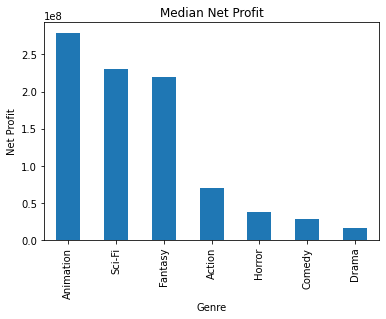

In [345]:
genre_net_profit.plot(kind = "bar")
plt.xlabel("Genre")
plt.ylabel("Net Profit")
plt.title("Median Net Profit")
plt.show()

- Median Budget of Primary Genres

In [352]:
genre_Budget = df.groupby("Primary_Genre")["Budget"].median().sort_values(ascending = False).head(7)

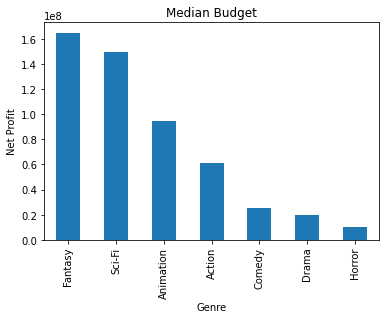

In [378]:
genre_Budget.plot(kind = "bar")
plt.xlabel("Genre")
plt.ylabel("Net Profit")
plt.title("Median Budget")
plt.show()

- Primary Genres with Highest ROI

In [363]:
top_genre_highest_roi = df.groupby('Primary_Genre')['ROI'].median().sort_values(ascending=False).head(7)

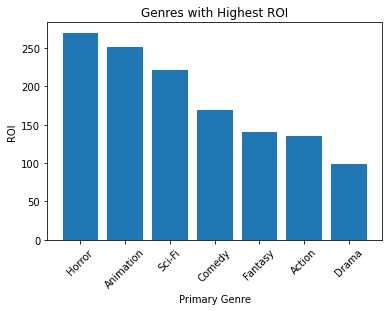

In [364]:
plt.bar(top_genre_highest_roi.index, top_genre_highest_roi.values)
plt.xlabel('Primary Genre')
plt.ylabel('ROI')
plt.title('Genres with Highest ROI')
plt.xticks(rotation=45)
plt.show()

- Median ROI of Horror Movie Directors

In [365]:
horror_movies = df[df["Primary_Genre"] == "Horror"]
director_mean_roi = horror_movies.groupby("Director")["ROI"].mean()
sorted_directors = director_mean_roi.sort_values(ascending = False)
top_5_highest_roi_directors = sorted_directors.head(5)

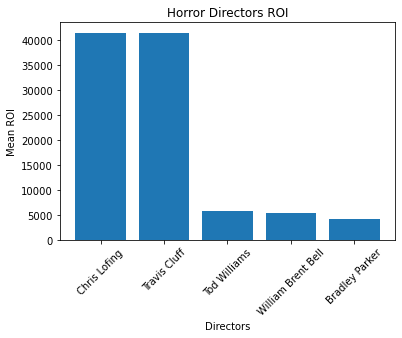

In [369]:
plt.bar(top_5_highest_roi_directors.index, top_5_highest_roi_directors.values)
plt.xlabel("Directors")
plt.ylabel("Mean ROI")
plt.title("Horror Directors ROI")
plt.xticks(rotation = 45)
plt.show()

- Median ROI of Animation Movie Directors

In [298]:
animation_movies = df[df["Primary_Genre"] == "Animation"]
animation_director_mean_roi = animation_movies.groupby("Director")["ROI"].mean()
sorted_animation_directors = animation_director_mean_roi.sort_values(ascending = False)
top_5_highest_animation_roi_directors = sorted_animation_directors.head(5)

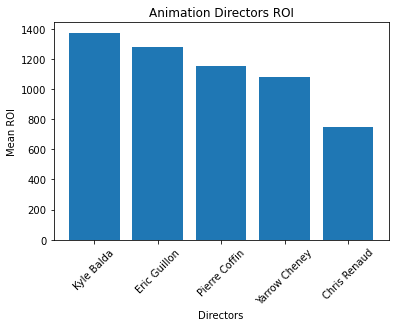

In [367]:
plt.bar(top_5_highest_animation_roi_directors.index, top_5_highest_animation_roi_directors.values)
plt.xlabel("Directors")
plt.ylabel("Mean ROI")
plt.title("Animation Directors ROI")
plt.xticks(rotation = 45)
plt.show()

In [368]:
from scipy.stats import linregress

In [219]:
slope, intercept, r_value, p_value, std_err = linregress(df["Budget"], df["Net_Profit"])

print("Slope:", slope)
print("Intercept:", intercept)
print("R-value:", r_value)
print("P-value:", p_value)
print("Standard Error:", std_err)

Slope: 2.4133987821085015
Intercept: -4712912.0309560895
R-value: 0.6584656714363493
P-value: 2.301226452449882e-188
Standard Error: 0.07103390736586025


## Simple Linear Regression ##

In [51]:
import seaborn as sns

- Simple Linear Regression: Budget vs Net Profit

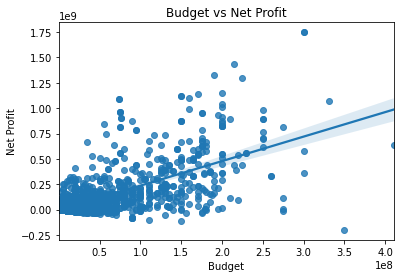

In [374]:
sns.regplot(data = df, x = "Budget", y = "Net_Profit")
plt.xlabel("Budget")
plt.ylabel("Net Profit")
plt.title("Budget vs Net Profit")
plt.show()

- Simple Linear Regression: Net Profit vs Budget of Horror Movies

In [359]:
horror_df = df[df['Primary_Genre'].str.contains('Horror')]

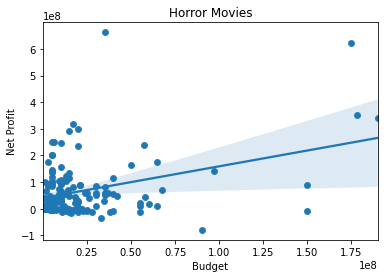

In [373]:
sns.scatterplot(x='Budget', y='Net_Profit', data=horror_df)
sns.regplot(x='Budget', y='Net_Profit', data=horror_df)
plt.xlabel('Budget')
plt.ylabel('Net Profit')
plt.title("Horror Movies")
plt.show()

- Simple Linear Regression: Net Profit vs Budget of Animation Movies

In [356]:
animation_df = df[df['Primary_Genre'].str.contains('Animation')]

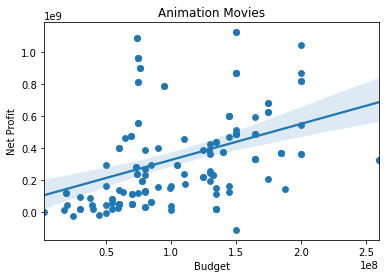

In [372]:
sns.scatterplot(x='Budget', y='Net_Profit', data=animation_df)
sns.regplot(x='Budget', y='Net_Profit', data=animation_df)
plt.xlabel('Budget')
plt.ylabel('Net Profit')
plt.title('Animation Movies')
plt.show()

# Recommendations #